# Vector.Ai Project
## part 1 Creating and training and model
### importing the models 

if the user doesnt have any of the necessary libraries, he can uncomment the below cell to download the missing libraries

In [ ]:
"""!pip install tensorflow
!pip install keras
!pip install shutil"""

In [1]:
import os
import zipfile
import random
import pandas as pd
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
import keras
from tensorflow.keras.utils import to_categorical
print(tf.version.VERSION)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


2.7.0


## Loading the model and pre-processing
### We have two ways of loading the Mnist model
#### 1. import using keras method in the below box ( but this method becoms rigid and uncustomisable for other data
we load the model using keras convinient loading method, normalise the pixel values and one hot encode the labels for multiclass classification

In [2]:
# pre-defined way for fashion-mnist

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

#### 2. OR directly load the data from the csv file as hosted on the internet. This method is much more flexible for diferent dataset

In [3]:

train_df = pd.read_csv('./fashion-mnist_train.csv',sep=',') # change these csv destination to custom dataset 
test_df = pd.read_csv('./fashion-mnist_test.csv', sep = ',')#with the assumption of label column is at the end


train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test= test_data[:,1:]/255
y_test=test_data[:,0]

## Pre-process the data

In [4]:
trainX = x_train.reshape((x_train.shape[0], 28, 28, 1))
testX = x_test.reshape((x_test.shape[0], 28, 28, 1))
trainX = trainX/255
testX = testX/255
trainY = to_categorical(y_train,10)
testY =to_categorical(y_test,10)
print(trainX.shape,testX.shape,trainY.shape,testY.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


dynamically get the number of classes in the dataset and get name of classes.
##### The labels list can be changes for custom class names starting with index 0 

In [5]:
labels = ["top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
no_of_labels = testY.shape[-1]
print("total classes = ",no_of_labels)

total classes =  10


# Visual representation
to make things bit intereseting here is one of the image we are working with. They are grayscaled with a pixel size of 28x28

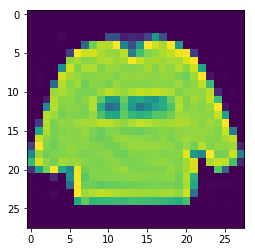

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0].reshape((28,28)))

## Model Training

Running the below code would compile the neural network architecture and give an insight of the parameters and structure of the Neural network.

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3])),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(4, (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(no_of_labels, activation='softmax')

])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 4)         132       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 4)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 144)               0         
                                                                 
 dense (Dense)               (None, 10)                1

The below method will initialise the training process. to increase the speed of the training time the user can reduce the epochs or increase the batch size. Although doing this might effect the accuracy. I have also implemented a custom callback function called saver which only save the best weight according to the validation accuracy. Thus by-passing overfitting

In [28]:
old =0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('fashion.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()
history = model.fit(trainX, trainY,
                         batch_size=128, epochs=20,
                         verbose=1,validation_data=(testX, testY),callbacks=[saver])

Epoch 1/20
469/469 [==============================] - 9s 18ms/step - loss: 0.9548 - acc: 0.6648 - val_loss: 0.6251 - val_acc: 0.7725
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.5548 - acc: 0.7963 - val_loss: 0.5432 - val_acc: 0.8014oss: 0.5561 - acc:
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.5023 - acc: 0.8157 - val_loss: 0.5021 - val_acc: 0.8157
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 0.4744 - acc: 0.8263 - val_loss: 0.4872 - val_acc: 0.8196
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 0.4575 - acc: 0.8321 - val_loss: 0.4686 - val_acc: 0.8272
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.4439 - acc: 0.8385 - val_loss: 0.4620 - val_acc: 0.8289
Epoch 7/20
469/469 [==============================] - 8s 16ms/step - loss: 0.4313 - acc: 0.8436 - val_loss: 0.4604 - val_acc: 0.8327
Epoch 8/20
469/469 [==============================]

Lets visualize how our model performed throughout the training process

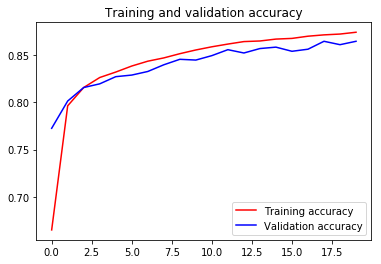

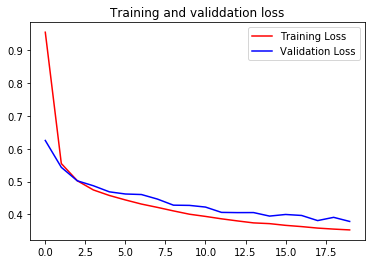

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validdation loss')
plt.legend()

plt.show()

## Model Evaluation


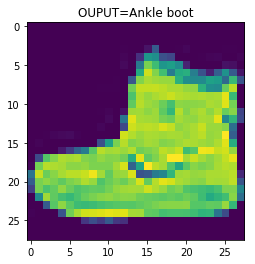

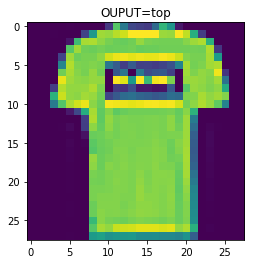

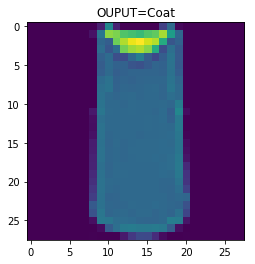

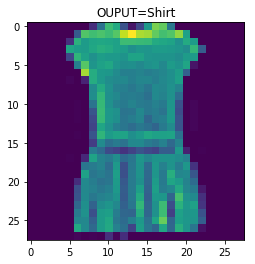

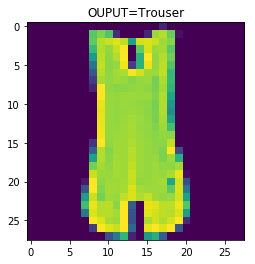

In [8]:
import cv2
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

model=tf.keras.models.load_model(r'fashion.h5')
for i in range(0,5):
    img = cv2.imread(r"fashion{}.png".format(i)) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x = image.img_to_array(img)
    x = np.expand_dims(img, axis=0)
    images = np.vstack([x])
    classes = model.predict(x, batch_size=4)
    classes = np.argmax(classes, axis = 1)
    classes = classes[0]
    plt.imshow(img)
    plt.title("OUPUT="+labels[classes])
    plt.show()

# Part 2 Apache Kafka 
## Pre requisiste: Start/ Setup the kafka and zookeeper kernel server on your local PC
### Furthermore run below line of code to start the server and topic
#### these kernels can also be started manually if the system paths downt match

In [12]:
import os
import time
os.system('start "zookeeper" cmd /k "cd "\" && C: && cd "C:\\Tools\\apache-zookeeper-3.7.0" && zkserver"')
time.sleep(15)#wait for zookeeper to start and initialize
os.system('start "kafka" cmd /k "cd "\" && C: && cd "C:\\Tools\\kafka_2.12-2.7.0" && .\\bin\\windows\\kafka-server-start.bat .\\config\\server.properties"')

0

0

In [43]:
!C:\Tools\kafka_2.13-3.0.0\bin\windows\kafka-topics.bat --create --zookeeper localhost:2181 --replication-factor 1 --partitions 1 --topic numtest

Exception in thread "main" joptsimple.UnrecognizedOptionException: zookeeper is not a recognized option
	at joptsimple.OptionException.unrecognizedOption(OptionException.java:108)
	at joptsimple.OptionParser.handleLongOptionToken(OptionParser.java:510)
	at joptsimple.OptionParserState$2.handleArgument(OptionParserState.java:56)
	at joptsimple.OptionParser.parse(OptionParser.java:396)
	at kafka.admin.TopicCommand$TopicCommandOptions.<init>(TopicCommand.scala:517)
	at kafka.admin.TopicCommand$.main(TopicCommand.scala:47)
	at kafka.admin.TopicCommand.main(TopicCommand.scala)


In [2]:
from time import sleep
from json import dumps
from kafka import KafkaProducer
from kafka import KafkaConsumer
import threading, time
from json import loads
class Producer():
    def __init__(self):
        self.producer = KafkaProducer(bootstrap_servers=['localhost:9092'],
                         value_serializer=lambda x: 
                         dumps(x).encode('utf-8'))

    def send(self):
        data = input("input the message you want to send to the host\n")
        self.producer.send('numtest', value=data)
        print("data sent!")
        time.sleep(1)
    def close(self):
        self.producer.close()
        
        
class Consumer():
    def __init__(self):
        self.consumer = KafkaConsumer(
                    'numtest',
                     bootstrap_servers=['localhost:9092'],
                     auto_offset_reset='earliest',
                     enable_auto_commit=True,
                     group_id='my-group',
                     value_deserializer=lambda x: loads(x.decode('utf-8')),consumer_timeout_ms=10000)
    def recieve(self):
        print("waiting.......")
        for message in self.consumer:
            message = message.value
            print('"{}" recieved'.format(message))
    def close(self):
        self.consumer.close()

In [9]:
app=Producer()
app.send()
app.close()

input the message you want to send to the host
hello world
data sent!


In [3]:
client= Consumer()
client.recieve()
client.close()

waiting.......
"Ankle boot" recieved


# Part 3 ML DEPLOYEMENT

In [8]:
import time
from json import dumps
from kafka import KafkaConsumer,KafkaProducer
import cv2
import logging
import numpy as np
import codecs, json 
from pympler.asizeof import asizeof
import io
import base64
from PIL import Image
from keras.preprocessing import image
from json import loads
from tensorflow.keras.models import load_model

class MLProducer():
    def __init__(self):
        self.producer = KafkaProducer(bootstrap_servers=['localhost:9092'],
                         value_serializer=lambda x: 
                         dumps(x).encode('utf-8'))
        self.consumer = KafkaConsumer(
                    'numtest',
                     bootstrap_servers=['localhost:9092'],
                     auto_offset_reset='latest',
                     enable_auto_commit=True,
                     group_id="my-group2",
                     value_deserializer=lambda x: loads(x.decode('utf-8')),consumer_timeout_ms=10000)
        
    def encode_and_transmit_numpy_array_in_bytes(self,numpy_array:np.array) -> str:
    # Create a Byte Stream Pointer
        compressed_file = io.BytesIO()

        # Use PIL JPEG reduction to save the image to bytes
        Image.fromarray(numpy_array).save(compressed_file, format="JPEG")

        # Set index to start position
        compressed_file.seek(0)

        # Convert the byte representation to base 64 representation for REST Post
        return json.dumps(base64.b64encode(compressed_file.read()).decode())
    
    def send(self,img):
        self.img = img
        j_dumps = self.encode_and_transmit_numpy_array_in_bytes(self.img)
        self.producer.send('numtest',value=j_dumps)
        time.sleep(2)
        print("data sent!")
        #self.recieve()
        
        
    def recieve(self):
        print("client waiting.......")
        for message in self.consumer:
            if(message.key==b'rep'):
                message = message.value
                print('"{}" recieved from broker'.format(message))
            
    def close(self):
        self.producer.close()
    
        
        
class MLConsumer():
    
    def __init__(self,model_name,labels):
        self.labels = labels
        self.model_name=model_name
        self.model = load_model(model_name)
        config = self.model.get_config() 
        shape = config["layers"][0]["config"]["batch_input_shape"]
        self.input_l = (shape[1],shape[2],shape[3])
        self.consumer = KafkaConsumer(
                    'numtest',
                     bootstrap_servers=['localhost:9092'],
                     auto_offset_reset='latest',
                     enable_auto_commit=True,
                     group_id='my-group',
                     value_deserializer=lambda x: loads(x.decode('utf-8')),consumer_timeout_ms=15000)
        self.producer = KafkaProducer(bootstrap_servers=['localhost:9092'],
                         value_serializer=lambda x: 
                         dumps(x).encode('utf-8'))
        
    def receive_and_decode_bytes_to_numpy_array(self,j_dumps:str) -> np.array:
        # Convert Base 64 representation to byte representation
        compressed_data = base64.b64decode(j_dumps)

        # Read byte array to an Image
        im = Image.open(io.BytesIO(compressed_data))

        # Return Image to numpy array format
        return np.array(im)
    
    def preprocess(self,data):
        print("pre-processing")
        k = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
        k= cv2.resize(k,(self.input_l[0],self.input_l[1]))
        k = image.img_to_array(k)
        k = np.expand_dims(k, axis=0)
        k = np.vstack([k])
        classes = self.model.predict(k)
        classes = np.argmax(classes, axis = 1)
        return classes
    
    def recieve(self):
        print("waiting.......")
        for message in self.consumer:
            print("data recieved")
            x = message.value
            try:
                k= self.receive_and_decode_bytes_to_numpy_array(x)
            except:
                #print("data format incorrect")
                continue
            classes = self.preprocess(k)
            output = self.labels[classes[0]]
            print('"{}" predicted by model.....sending to client'.format(output))
        self.send(output)
            
    def send(self,data):
        self.data = data
        self.producer.send('numtest',key=b'rep', value=self.data)
        print("data sent!")
                
    def close(self):
        self.consumer.close()
        
    
        
    

In [9]:
img = cv2.imread(r"fashion0.png")# change dest to send a different image
labels = ["top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

client = MLConsumer(r'fashion.h5',labels)
app = MLProducer()

app.send(img)

client.recieve()

app.recieve()

app.close()
client.close()

data sent!
waiting.......
data recieved
data recieved
pre-processing
"Ankle boot" predicted by model.....sending to client
data sent!
client waiting.......
"Ankle boot" recieved from broker
